In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

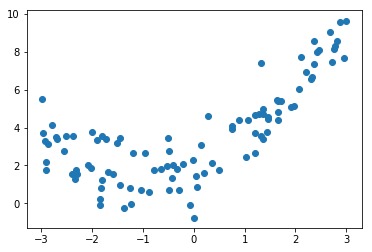

In [3]:
plt.scatter(x, y)
plt.show()

### 学习曲线

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [5]:
X_train.shape

(75, 1)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
# 一共有75个
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

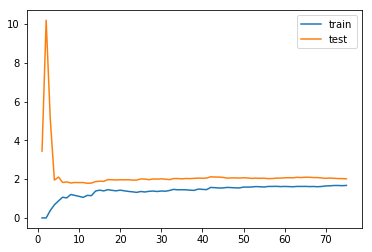

In [12]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label='test')
plt.legend()
plt.show()

In [15]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    num = len(X_train) + 1
    for i in range(1, num):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = lin_reg.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, num)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, num)], np.sqrt(test_score), label='test')
    plt.legend()
    # 0<=x<=num, 0<=y<=4
    plt.axis([0, num, 0, 4])
    plt.show()

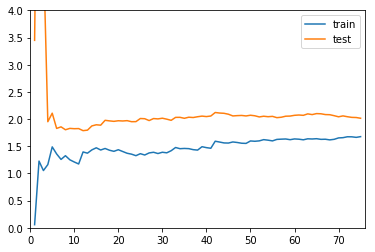

In [16]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return  Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('line_reg', LinearRegression())
    ])

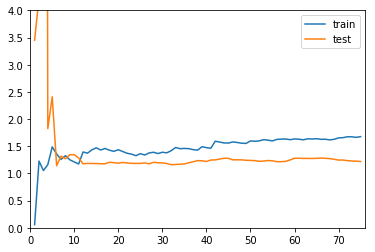

In [18]:
pol2_reg = PolynomialRegression(2)
plot_learning_curve(pol2_reg, X_train, X_test, y_train, y_test)

### 数据集的划分

- 训练数据集: 用于训练模型
- 验证数据集: 用于调整超参
- 测试数据集: 用于验证泛化

### 交叉验证 （西瓜书有说明）

In [19]:
import numpy as np
from sklearn import datasets

In [20]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
best_score, best_p, best_k = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 5):
        knn = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p, n_jobs=-1)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k

print("Best K = %d" % best_k)
print("Best p = %d" % best_p)
print("Best score = %s" % best_score)

Best K = 5
Best p = 2
Best score = 0.9866666666666667


### 使用交叉验证

In [27]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train)

C:\Users\enmonster\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98896247, 0.98210291, 0.98210291])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
best_score, best_p, best_k = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 5):
        knn = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p, n_jobs=-1)
        knn.fit(X_train, y_train)
        # cv=3 分成3分
        scores = cross_val_score(knn, X_train, y_train, cv=3)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k

print("Best K = %d" % best_k)
print("Best p = %d" % best_p)
print("Best score = %s" % best_score)

Best K = 5
Best p = 3
Best score = 0.9866166891368011


###  交叉验证是为了获取最佳的参数

In [33]:
best_knn =  KNeighborsClassifier(weights="distance", n_neighbors=5, p=3, n_jobs=-1)
best_knn.fit(X_train, y_train)
best_knn.score(X_test, y_test)

0.9822222222222222